In [128]:
#This is the data cleaning file - please push new version through the data cleaning branch in git 

In [129]:
#import the necessary packages 
import pandas as pd 
import numpy as np 
import sklearn
import statsmodels.api as sm
import scipy
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from dateutil.relativedelta import *
pd.set_option('display.max_columns', None)

In [130]:
#import the dataset as a panda dataframe 
df = pd.read_excel("RBA_KYC_Accounts_ALL_Ids.xlsx")

In [131]:
df['Risk_Description'] = df['rba_grade_desc']
df.drop(['rba_grade_desc'], axis = 1, inplace = True) 

In [132]:
df.describe(include  = 'all')

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,score_card_Desc,rbaValue,Risk_Description
count,224868.0,224868.000000,2.248680e+05,224868,224868.000000,224868,224868,224868.000000,224272,221429,1793,220153,220153.000000,0.0,203026,79748.000000,114574.000000,12,0.0,224868,224868.000000,224868,224868.000000,224868.0,224868.000000,224868.000000,224868.000000,104357.000000,222252.000000,0.0,2.248680e+05,2.248680e+05,224868.000000,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868,224868,224868,0.0,224868.000000,224868
unique,NaN,NaN,NaN,220434,NaN,7041,2,NaN,62,67,35,21457,NaN,NaN,1000,NaN,NaN,1,NaN,1,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,4,NaN,NaN,3
top,NaN,NaN,NaN,020902507770010010000,NaN,2013-11-20,N,NaN,JO,JO,US,1992-07-22,NaN,NaN,????,NaN,NaN,ZLVK2E.99999.SL.400,NaN,Active,NaN,JOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-24,L,I-Existing,NaN,NaN,Low
freq,NaN,NaN,NaN,26,NaN,1079,219791,NaN,219253,213141,1028,1035,NaN,NaN,76312,NaN,NaN,12,NaN,224868,NaN,214657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224868,159680,178495,NaN,NaN,159680
mean,1.0,448.451323,4.394503e+16,NaN,1.114418,NaN,NaN,1.021221,NaN,NaN,NaN,NaN,41.310575,NaN,NaN,18.309487,49.857577,NaN,NaN,NaN,1059.328757,NaN,0.021653,0.0,3.765231,89.388632,35.509014,1.250975,1.193564,NaN,7.832261e+03,1.988950e+03,18.871381,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,NaN,NaN,NaN,17.624194,NaN
std,0.0,228.193308,2.349321e+16,NaN,0.318319,NaN,NaN,0.144122,NaN,NaN,NaN,NaN,16.000536,NaN,NaN,6.586481,6.736115,NaN,NaN,NaN,1280.875258,NaN,0.145547,0.0,4.305015,29.406849,15.491855,0.433576,0.528191,NaN,1.325116e+06,3.344322e+05,3685.041168,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,NaN,NaN,NaN,8.368345,NaN
min,1.0,201.000000,2.020028e+09,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,-1.791005e+08,-4.513426e+07,-485686.730000,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,4.080000,NaN
25%,1.0,208.000000,2.070207e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,20.000000,51.000000,NaN,NaN,NaN,20.000000,NaN,0.000000,0.0,2.000000,90.000000,20.000000,1.000000,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,13.330000,NaN
50%,1.0,401.000000,4.011205e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,20.000000,51.000000,NaN,NaN,NaN,1302.000000,NaN,0.000000,0.0,2.000000,90.000000,35.000000,1.000000,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,16.530000,NaN
75%,1.0,701.000000,7.012410e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,21.000000,51.000000,NaN,NaN,NaN,1396.000000,NaN,0.000000,0.0,2.000000,90.000000,51.000000,2.000000,1.000000,NaN,6.914525e+02,1.826150e+02,1.100000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN

In [133]:
df.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,score_card_Desc,rbaValue,Risk_Description
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,E-Existing,NaN,13.20,Low
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,NaN,16.93,Low
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,I-Existing,NaN,16.93,Low
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,I-Existing,NaN,16.93,Low


## Note 
- interrogation mark in dataset 
- word and integer in risk descrition, resident country and nationality original 
- multiple outliers 

## Creating the variable creationDate_indays

In [134]:
df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]') 
df['creationDate_indays'].head()

0   1295 days
1   1860 days
2   1860 days
3   1860 days
4   1860 days
Name: creationDate_indays, dtype: timedelta64[ns]

## Creating the variable date of birth

In [135]:
def f(end):
    global max_date
    try:
        r = relativedelta(max_date, end) 
        return(r.years)
    except:
        return(0)
#    r = relativedelta(pd.to_datetime('now'), end) 
#    return '{} years {} days'.format(r.years, r.days)

In [136]:
max_date = df['date_of_assessment'].astype('datetime64[ns]').max()
df['age'] = df['dateOfBirth'].astype('datetime64[ns]').apply(f)
df['age'].head()

0     0
1    29
2    29
3    29
4    29
Name: age, dtype: int64

In [137]:
#assigning df to another var / avoid reloading the dataset if an eroor arises 
df1 = df 

In [138]:
#Check the averages of deposit and withdrawalls
[print(col + ": "+str(round(np.average(df1[col])))) for col in df1.iloc[:,30:40].columns]

avg_last_10_days: 7832.0
avg_last_30_days: 1989.0
avg_last_90_days: 19.0
number_of_cash_dep_90_days: 0.0
avg_cash_deposit_90_days: -1113.0
number_of_deposit_90_days: 1.0
avg_of_dep_90_days: -3540.0
number_of_cash_wd_90_days: 0.0
avg_of_cash_wd_90_days: 476.0
number_of_wd_90_days: 1.0


[None, None, None, None, None, None, None, None, None, None]

## Checking for percentage (%) of missing values

In [139]:
print(100*df1.isnull().sum()/df1.isnull().count())

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

In [140]:
#Other metrics for null values

import re
#interrogation points
for name in df1.columns:
    li = []
    for el in df1[name].astype(str):
        li.append(len(re.findall("\?.*",el)))
    print(name)
    print(100 * sum(li) / len(df1[name]))
#birthplace  has 89.3% ? mark + 9.7% of missing values = 99% missing data

org_code
0.0
branchCode
0.0
customerId
0.0
fullaccount
0.0
customerType
0.0
creationDate
0.0
onboarding
0.0
residentStatus
0.0
residentCountry
0.0
nationalityOriginal
0.0
extraNationality
0.0
dateOfBirth
0.0
age_in_year
0.0
birthCountry
0.0
birthPlace
89.30572602593521
profession
0.0
companyType
0.0
giinCode
0.0
lastUpdate
0.0
status
0.0
ledgerCode
0.0
accountCurrency
0.0
jointAccount
0.0
IsBlackListed
0.0
CUS_CLASS
0.0
ECO_SEC
0.0
TYPE_OF_DEP
0.0
GENDER
0.0
LEGAL_STA_CODE
0.0
legal_Stat_desc
0.0
avg_last_10_days
0.0
avg_last_30_days
0.0
avg_last_90_days
0.0
number_of_cash_dep_90_days
0.0
avg_cash_deposit_90_days
0.0
number_of_deposit_90_days
0.0
avg_of_dep_90_days
0.0
number_of_cash_wd_90_days
0.0
avg_of_cash_wd_90_days
0.0
number_of_wd_90_days
0.0
avg_of_wd_90_days
0.0
date_of_assessment
0.0
rbaGradeAbrv
0.0
score_card
0.0
score_card_Desc
0.0
rbaValue
0.0
Risk_Description
0.0
creationDate_indays
0.0
age
0.0


In [141]:
#check for string na
    #assign null if n/a as string 
def inter(df):
    summed = []
    for col in df.columns:
        indiv = []
        for el in df[col].astype(str):
            if el == 'nan' or el == 'NaN':
                indiv.append(el)
        summed.append(col)
        summed.append(100 * len(indiv) / len(df[col]))
        df[col].loc[el] = None
    return [summed,df]

result = inter(df1)
print(result[0])
df1 = result[1]

['org_code', 0.0, 'branchCode', 0.0, 'customerId', 0.0, 'fullaccount', 0.0, 'customerType', 0.0, 'creationDate', 0.0, 'onboarding', 0.0, 'residentStatus', 0.0, 'residentCountry', 0.2650443815927566, 'nationalityOriginal', 1.5293416582172652, 'extraNationality', 99.20264332853051, 'dateOfBirth', 2.0967856698151803, 'age_in_year', 2.0967856698151803, 'birthCountry', 100.0, 'birthPlace', 9.71325399790099, 'profession', 64.53563868580679, 'companyType', 49.04833057616024, 'giinCode', 99.99466353594109, 'lastUpdate', 100.0, 'status', 0.0, 'ledgerCode', 0.0, 'accountCurrency', 0.0, 'jointAccount', 0.0, 'IsBlackListed', 0.0, 'CUS_CLASS', 0.0, 'ECO_SEC', 0.0, 'TYPE_OF_DEP', 0.0, 'GENDER', 53.591885016987746, 'LEGAL_STA_CODE', 1.1633491648433747, 'legal_Stat_desc', 100.0, 'avg_last_10_days', 0.0, 'avg_last_30_days', 0.0, 'avg_last_90_days', 0.0, 'number_of_cash_dep_90_days', 0.0, 'avg_cash_deposit_90_days', 0.0, 'number_of_deposit_90_days', 0.0, 'avg_of_dep_90_days', 0.0, 'number_of_cash_wd_90_

# Making some graph 

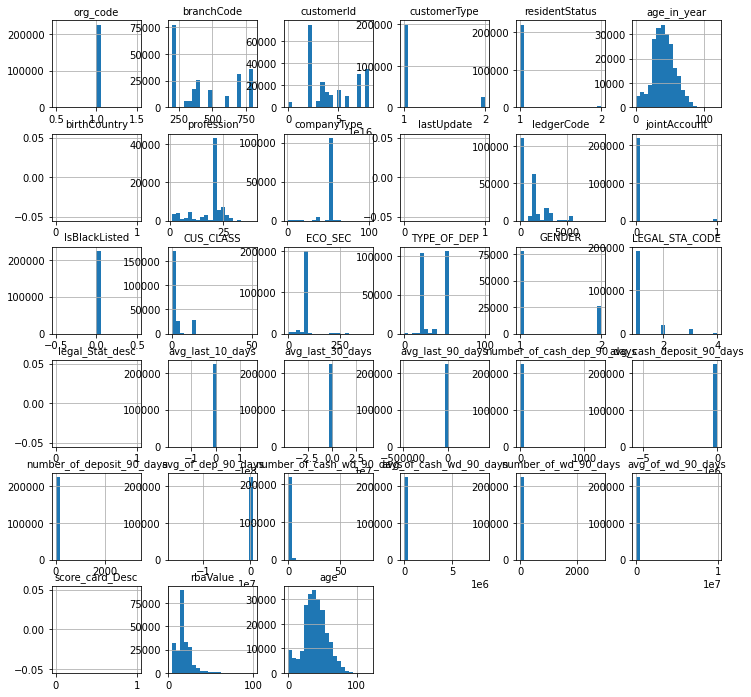

In [142]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

# Insert here decription of variable 
- RBA (target in regaression):

218768
0
count    218768.000000
mean         17.444417
std           8.299832
min           4.080000
25%          13.280000
50%          16.530000
75%          21.200000
max         100.000000
Name: rbaValue, dtype: float64


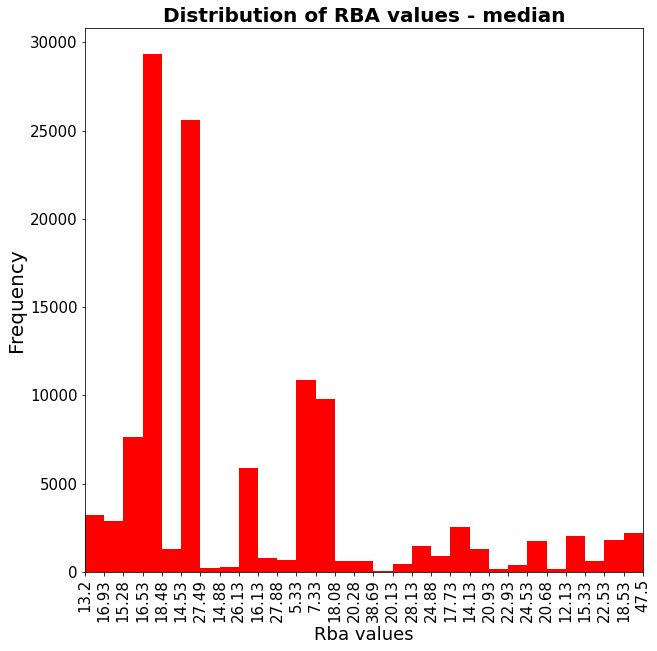

skeweness test 
1.3794762038473176
skeness higher than one, highly skewed, lets take the logarithm of RBA
-0.525713125149002


In [220]:
from matplotlib import pyplot 
#size of rba
print(len(df1['rbaValue']))
#number of nulls
print(df1['rbaValue'].isnull().sum())
#other stat
print(df1['rbaValue'].describe())


bins = range(30)
rbahist = df['rbaValue'].hist(bins = bins, figsize = (10, 10),
                                   grid = False,facecolor='r',range=(min(df['rbaValue']), max(df['rbaValue'])))
#set x axis legend to the median of the bin
plt.xlim(bins[0], bins[-1])
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
rbahist.set_xlabel('Rba values',fontsize=18)
rbahist.set_ylabel(('Frequency') ,fontsize=20)
rbahist.set_title('Distribution of RBA values - median',fontsize=20,weight='bold')
plt.show()

print("skeweness test ")
data = pd.to_numeric(df['rbaValue'], downcast='integer')
print(scipy.stats.skew(data))
print("skeness higher than one, highly skewed, lets take the logarithm of RBA") 
print(scipy.stats.skew(np.log2(data)))
df1['rbaValue'] = np.log2(df1['rbaValue'])

# Missing values
1. drop the 100% missing values column 
2. inspect the column with a single value 
3. decide by collumn to fill or/and drop missing values 

In [144]:
print(np.mean(df1['age']))
print('age column is fully equal to 0 lets drop it ')

39.58542344842307
age column is fully equal to 0 lets drop it 


In [145]:
df1 = df1.drop(["score_card_Desc","birthCountry","lastUpdate","legal_Stat_desc","age_in_year","giinCode","birthPlace"], axis = 1)
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,profession,companyType,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,rbaValue,Risk_Description,creationDate_indays,age
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,35.0,Active,5817,JOD,0,0,4,46,35,NaN,2.0,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,E-Existing,13.20,Low,1295 days,0
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,27.0,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,16.93,Low,1860 days,29
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,27.0,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,I-Existing,16.93,Low,1860 days,29
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,27.0,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,I-Existing,16.93,Low,1860 days,29
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,27.0,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,I-Existing,16.93,Low,1860 days,29


In [146]:
#not sure yet
df1 = df1.drop(['extraNationality'], axis = 1)

In [147]:
#Check for companies to fill gender, birthplace, birthcountry ...
companies = df1[(df1.customerType ==2 )]
#other values ie 51,35 see below 
print(companies.describe())
print(100*companies.isnull().sum()/companies.isnull().count())
print(len(companies))
#we can see only a very few company type are missing compared to the overall dtb ratio (49%) so we are really talking about companies !
#the following fields are set as null for companies; Gender, profession lets remedy to it !

       org_code    branchCode    customerId  customerType  residentStatus  \
count   25729.0  25729.000000  2.572900e+04       25729.0    25729.000000   
mean        1.0    340.531035  3.334839e+16           2.0        1.003304   
std         0.0    186.983936  1.935207e+16           0.0        0.057384   
min         1.0    201.000000  2.020081e+09           2.0        1.000000   
25%         1.0    206.000000  2.060023e+16           2.0        1.000000   
50%         1.0    208.000000  2.080231e+16           2.0        1.000000   
75%         1.0    402.000000  4.021229e+16           2.0        1.000000   
max         1.0    805.000000  8.052727e+16           2.0        2.000000   

        profession   companyType    ledgerCode  jointAccount  IsBlackListed  \
count  1145.000000  24250.000000  25729.000000  25729.000000        25729.0   
mean     20.405240     46.333402   1478.129970      0.026973            0.0   
std       6.579793     13.454584   1336.402037      0.162009         

In [148]:
df1['GENDER'] = df1['GENDER'].fillna(0).replace('NaN',0)
#if it is a company the value is filled with an integer over 0
df1['companyType'] = df1['companyType'].fillna(0).replace('NaN',0)
df1['dateOfBirth'] = df1['dateOfBirth'].fillna("00/00/0000").replace('NaN',"00/00/0000")
df1['profession'] = df1['profession'].fillna('company').replace('NaN','company')
#how many companies are we talking about ?
df1[df1.profession == 'company'].count()



org_code                      145120
branchCode                    145120
customerId                    145120
fullaccount                   145120
customerType                  145120
creationDate                  145120
onboarding                    145120
residentStatus                145120
residentCountry               144663
nationalityOriginal           142971
dateOfBirth                   145120
profession                    145120
companyType                   145120
status                        145120
ledgerCode                    145120
accountCurrency               145120
jointAccount                  145120
IsBlackListed                 145120
CUS_CLASS                     145120
ECO_SEC                       145120
TYPE_OF_DEP                   145120
GENDER                        145120
LEGAL_STA_CODE                142558
avg_last_10_days              145120
avg_last_30_days              145120
avg_last_90_days              145120
number_of_cash_dep_90_days    145120
a

In [149]:
#check for other column with a single value 
print({col: df1[col].nunique() for col in df1.columns})
print("")
#Org_code, status,isBlackListed,date_of_assessment have only 1 values; flag variable ??
print({col: pd.Series(df1[col]).drop_duplicates().tolist() for col in df1.columns if df1[col].nunique() == 1})
#see below the unique value text to check for a flag or not: if it has null values it could be that the user input a 
#value for a scenario such as blacklisted or let as null if not 
{col: pd.Series(df1[col]).isna().sum() for col in df1.columns if df1[col].nunique() == 1}
#no missing values for the selected collumn, the above theory does not apply to any of the collumn, they are to be dropped

df1 = df1.drop(["org_code","status","IsBlackListed","date_of_assessment"], axis = 1)





{'org_code': 1, 'branchCode': 30, 'customerId': 75339, 'fullaccount': 220434, 'customerType': 2, 'creationDate': 7041, 'onboarding': 2, 'residentStatus': 2, 'residentCountry': 62, 'nationalityOriginal': 67, 'dateOfBirth': 21458, 'profession': 33, 'companyType': 34, 'status': 1, 'ledgerCode': 227, 'accountCurrency': 20, 'jointAccount': 2, 'IsBlackListed': 1, 'CUS_CLASS': 10, 'ECO_SEC': 206, 'TYPE_OF_DEP': 51, 'GENDER': 3, 'LEGAL_STA_CODE': 4, 'avg_last_10_days': 106519, 'avg_last_30_days': 94287, 'avg_last_90_days': 37665, 'number_of_cash_dep_90_days': 151, 'avg_cash_deposit_90_days': 5780, 'number_of_deposit_90_days': 293, 'avg_of_dep_90_days': 11215, 'number_of_cash_wd_90_days': 45, 'avg_of_cash_wd_90_days': 5348, 'number_of_wd_90_days': 259, 'avg_of_wd_90_days': 8674, 'date_of_assessment': 1, 'rbaGradeAbrv': 3, 'score_card': 4, 'rbaValue': 692, 'Risk_Description': 3, 'creationDate_indays': 7041, 'age': 108}

{'org_code': [1], 'status': ['Active'], 'IsBlackListed': [0], 'date_of_asses

In [150]:
#droppping the few nas left
df1 = df1.dropna(axis=0,how='any') 

In [151]:
print(100*df1.isnull().sum()/df1.isnull().count())
df1['customerId'].count()

branchCode                    0.0
customerId                    0.0
fullaccount                   0.0
customerType                  0.0
creationDate                  0.0
onboarding                    0.0
residentStatus                0.0
residentCountry               0.0
nationalityOriginal           0.0
dateOfBirth                   0.0
profession                    0.0
companyType                   0.0
ledgerCode                    0.0
accountCurrency               0.0
jointAccount                  0.0
CUS_CLASS                     0.0
ECO_SEC                       0.0
TYPE_OF_DEP                   0.0
GENDER                        0.0
LEGAL_STA_CODE                0.0
avg_last_10_days              0.0
avg_last_30_days              0.0
avg_last_90_days              0.0
number_of_cash_dep_90_days    0.0
avg_cash_deposit_90_days      0.0
number_of_deposit_90_days     0.0
avg_of_dep_90_days            0.0
number_of_cash_wd_90_days     0.0
avg_of_cash_wd_90_days        0.0
number_of_wd_9

218768

In [152]:
df1.head()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,dateOfBirth,profession,companyType,ledgerCode,accountCurrency,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaGradeAbrv,score_card,rbaValue,Risk_Description,creationDate_indays,age
0,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,00/00/0000,company,35.0,5817,JOD,0,4,46,35,0.0,2.0,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,L,E-Existing,13.20,Low,1295 days,0
1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,1989-06-30,27.0,0.0,1330,JOD,0,2,90,23,2.0,1.0,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,L,I-Existing,16.93,Low,1860 days,29
2,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,1989-06-30,27.0,0.0,1389,JOD,0,2,90,23,2.0,1.0,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,L,I-Existing,16.93,Low,1860 days,29
3,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,1989-06-30,27.0,0.0,60,JOD,0,2,90,23,2.0,1.0,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,L,I-Existing,16.93,Low,1860 days,29
4,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,1989-06-30,27.0,0.0,10,JOD,0,2,90,23,2.0,1.0,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,L,I-Existing,16.93,Low,1860 days,29


# Cleaning data types

In [153]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def clear_backslash(text):
    ''' Function to clear backslash as they cause all sort of troubles '''
    result = text
    if "\\" in text:
        result = '0'
    return (result)

In [154]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def text_to_num(text):
    ''' DOC STRING: Function to transform numbers with letter into pure numbers, example: 3.17B into 3,170,000,000 '''
    if type(text) != str:
        return(text)
    result = 0.0  
    text = text.replace(",", "")  
    try:
            if text[-1] in d:
                num, magnitude = text[:-1], text[-1]
                result = float(num) * (10 ** d[magnitude])  #this case is when "text" has T, B, M, k or %
            else:
                result = float(text) #this case is when "text" is string but look like a numeric
    except:
        try:
            result = 1.0*text #this is when "text" is already numeric
        except:
            result = text #it will reach this case when it is impossible to transform into numeric
    return(result)

In [155]:
for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df[fieldname].astype(str))
        df[fieldname] = np.vectorize(text_to_num)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

branchCode
customerId
fullaccount
customerType
creationDate
onboarding
residentStatus
residentCountry
nationalityOriginal
dateOfBirth
profession
companyType
ledgerCode
accountCurrency
jointAccount
CUS_CLASS
ECO_SEC
TYPE_OF_DEP
GENDER
LEGAL_STA_CODE
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd_90_days
rbaGradeAbrv
score_card
rbaValue
Risk_Description
creationDate_indays
age


In [156]:
#Delete the minus sign in cash deposit
def nominus(t):
    t = t.replace("-", "")  
    return t
df1['avg_cash_deposit_90_days'] = np.vectorize(nominus)(df1['avg_cash_deposit_90_days'].astype(str))
df1['avg_cash_deposit_90_days'].iloc[1:5]

1      0.0
2      0.0
3    550.0
4    540.0
Name: avg_cash_deposit_90_days, dtype: object

# outliers 

In [193]:
def distribution(x):
    try:
        x.dropna()
        #umbalanced dataset: ets take the average of values that are not 0
        data_1 = np.ma.masked_where(x < 1, x)
        iqr = np.std(data_1)
        meanf = np.average(data_1)
        #replace measure of outlier here 
        H = round(meanf + 3 * iqr,2)
        L = round(meanf - 3 * iqr,2)
        if (L < 0):
            L = 0
        out = [H,L]
        return(out)
    except:
        pass 

#compare with each value to the respective column lower and higher bounds for outliers (bounds defined in distribution fun)
def outliers(x):
    limit = x.apply(distribution)
    y = pd.DataFrame()
    dt = pd.DataFrame(x)
    print(limit)
    #check how many outlier the row pocesses
    dt['outbounds'] = 0
    for el in dt.columns:
        #check if there are less than 2 values (no flag variables)
        if (dt[el].nunique() < 3):
            continue
        if el == 'outbounds':
            continue
        #unique to our dataset _ no codes or id or target variable 
        if limit[el].isnull().sum() > 0:
            continue
        print(el)
        #try to convert the number to float
        pd.to_numeric(dt[el], downcast="float")
        high = limit[el].iloc[0]
        low = limit[el].iloc[1]
        #imbalanced dataset what quantile to use ?
        Q1 = dt[el].quantile(0.25).copy()
        Q3 = dt[el].quantile(0.75).copy()
        count = 0
        for ele in dt[el]:
            if (ele > high):
                y = y.append([[el, high,low, ele]])
                #Impute the 75th perc if an outlier over the Hlimit
                dt.loc[count,el] = Q1
                dt.loc[count,'outbounds'] += 1
            elif (ele < low): 
                y = y.append([[el, high,low, ele]])
                #Impute the 25th perc if an outlier below the Llimit
                dt.loc[count,el] = Q3
                dt.loc[count,'outbounds'] += 1
            count += 1
    y.columns =[ 'column', 'Hlimit', 'Llimit' ,'value']
    return([y, dt])

b= outliers(df1.iloc[:,20:31])
dt_outliers = b[1]
listO = b[0]

#do we want to replace outliers they may be fraud ? keeping both databases 
#create an outlier flag column ?

# check value of quantiles 

   avg_last_10_days  avg_last_30_days  avg_last_90_days  \
0       13535633.48        3452277.64           44663.0   
1              0.00              0.00               0.0   

   number_of_cash_dep_90_days avg_cash_deposit_90_days  \
0                       30.53                     None   
1                        0.00                     None   

   number_of_deposit_90_days  avg_of_dep_90_days  number_of_cash_wd_90_days  \
0                      79.82            336117.0                      10.37   
1                       0.00                 0.0                       0.00   

   avg_of_cash_wd_90_days  number_of_wd_90_days  avg_of_wd_90_days  
0                64896.66                 302.7          1144742.1  
1                    0.00                   0.0                0.0  
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd

In [195]:
dt_outliers[dt_outliers.outbounds >= 1]

,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,outbounds
2,194.4025,44.605,0.12,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,3.0
3,2079.7900,526.870,6.68,4.0,550.0,4.0,0.000,1.0,50.0,1.0,50.0,1.0
4,444.0000,120.500,0.95,4.0,540.0,4.0,0.000,1.0,56.0,1.0,56.0,1.0
11,194.4025,44.605,0.12,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,3.0
12,194.4025,44.605,0.12,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9978,194.4025,44.605,0.12,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,3.0
9979,194.4025,44.605,0.12,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,3.0
9982,194.4025,44.605,0.12,0.0,0.0,3.0,-945.356,3.0,570.0,3.0,570.0,3.0
9997,194.4025,44.605,0.12,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,3.0


In [196]:
listO

,column,Hlimit,Llimit,value
0,avg_last_10_days,13535633.48,0.0,-137562.720
0,avg_last_10_days,13535633.48,0.0,-4210.930
0,avg_last_10_days,13535633.48,0.0,-11720.090
0,avg_last_10_days,13535633.48,0.0,-2425.440
0,avg_last_10_days,13535633.48,0.0,-27652.440
...,...,...,...,...
0,avg_of_wd_90_days,1144742.10,0.0,2140640.062
0,avg_of_wd_90_days,1144742.10,0.0,1384747.180
0,avg_of_wd_90_days,1144742.10,0.0,7815547.919
0,avg_of_wd_90_days,1144742.10,0.0,1468964.675


# Feature engineering

## Regression

In [234]:
from sklearn.model_selection import train_test_split
#only numerical collumns ! integer or the value is too big; no n/a
df1_regr = pd.DataFrame()
for col in df1.columns:
    try:
        df1_regr[col] = pd.to_numeric(df1[col], downcast="integer")
    except:
        continue

X = df1_regr.loc[:, df1_regr.columns != 'rbaValue']
y = df1_regr['rbaValue']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## Feature engineering by feature importance 

In [251]:
initial_lm_mod = Ridge(alpha = 1,normalize=True)
initial_lm_mod.fit(X_train,Y_train)
print(initial_lm_mod.score(X_train, Y_train))
def get_feature_importance(clf, feature_names):
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_# Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

0.19753731770137295


In [252]:
get_feature_importance(initial_lm_mod, X_train.columns)

,variable,coefficient
3,residentStatus,0.340000
25,outbounds,0.160000
11,LEGAL_STA_CODE,0.110000
2,customerType,0.100000
14,avg_last_90_days,0.000000
24,age,0.000000
23,creationDate_indays,0.000000
22,avg_of_wd_90_days,0.000000
21,number_of_wd_90_days,0.000000
20,avg_of_cash_wd_90_days,0.000000


In [ ]:
ig_selector = SelectKBest(score_func=mutual_info_classif).fit(X,y)

# Get the indices sorted by most important to least important
indices = np.argsort(ig_selector.scores_)[::-1]

ig_features = []
for i in range(len(X.columns)):
    ig_features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(10,10))
plt.yticks(rotation='horizontal',fontsize=16)
plt.barh(ig_features, ig_selector.scores_[indices[range(len(X.columns))]], color='r', align='center')
plt.gca().invert_yaxis()
plt.show()

## Compare feature engeneering with a stewise method 

In [ ]:
# Stepwise function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
stepwise_selection(X_train,Y_train)

# Linear regression model 

Predicting rba value

In [255]:
#training the model 
#Ridge regression model 
model = Ridge(alpha = 1.0,normalize = True)
#Cross validation
scores = cross_val_score(model, X_train, Y_train, cv=5)
print(scores)
interval = str(min(scores)) + str(max(scores)) 

[0.19657176 0.198176   0.19644016 0.19801498 0.19708467]


In [ ]:
#Testing the model 
y_new = model.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_new))


In [ ]:
plt.scatter(X_test, Y_test,  color='g', label = "correct values")
plt.plot(X_test, y_new, color='r', linewidth=3, label= "predicted values")
plt.legend(bbox_to_anchor=(0.7, 0.80), loc='center', borderaxespad=0., fontsize = 15)
plt.xticks(())
plt.yticks(())

plt.show()

Logistic: lasso / ridge -> categorize target -> outliers ! 
    Random forest ?
    LDA / PCA 
    Scaling - normalization?
Cross validation 
Split as a time serie ?

In [ ]:
# Classification 

val_pca = [10,11,12,13,14,15,16,17,18,19,20]
for pca in val_pca:
    PC = PCA(n_components=pca, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    PC.fit(dataset.iloc[:,2:32])
    newdt = PC.transform(dataset.iloc[:,2:32])
    X = newdt
    y = dataset.iloc[:,1]
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #training the model 
    #Ridge regression model 
    model = LinearDiscriminantAnalysis()
    #Cross validation
    scores = cross_val_score(model, X_train, Y_train, cv=5)
   # print(scores)
    interval = "PCA number:"+ str(pca) +" Interval: " + str(min(scores)) + " " + str(max(scores)) 
    print(interval)